# PROJECT 1 (PART 2)

In [16]:
# Import libraries - data processing
import pandas as pd
import numpy as np

# Import libraries -  manipulation of files and downloads
import os
from tqdm.notebook import tqdm

# Import libraries - visualitzation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# Global variables
YEARS = [2019, 2020, 2021, 2022]

# Definition of the data path in Google Drive
taxi_data_folder = '/content/drive/MyDrive/data'

# Mount Google Drive (only required if running from Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
# Import clean data
df = pd.read_csv(f'{taxi_data_folder}/clean_data.csv')

In [11]:
df.shape

(169620, 21)

In [ ]:
# list compreshion
lista = []
for i in range(10):
  lista.append(i**2)

[i**2 for i in range(10)), lista

(<generator object <genexpr> at 0x7d75e4425850>,
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

## 02. Visualizations (by years)

### Number of trips by year

Can you answer the question: **Has covid increased / decreased the number of trips made by taxis?**

To answer this question, create a bar figure showing the number of trips per year.

In [17]:
def plot_total_trips_per_year(df, column, xlabel, ylabel, title):
    """
        Display the total number of trips per any.
        :param df: DataFrame with the data of the travels.
        :param column: Column with these data of interest
        :param xlabel: X label
        :param ylabel: Y label
        :param title: Figure title
    """

    _year, _count = np.unique(df[column], return_counts=True)

    # Alternative: df['year'].value_counts().sort_index()
    print(xlabel)
    plt.bar(_year, _count)
    plt.xlabel(xlabel)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    return plt.show()

Number of trips


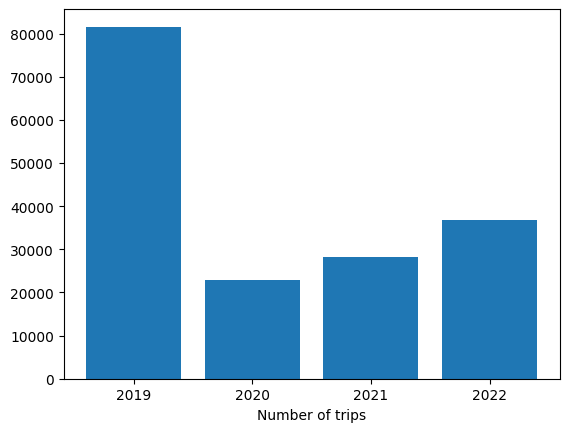

In [18]:
# Display of the total number of trips per any
plot_total_trips_per_year(df, 'year', 'Number of trips', 'Number of trips by year', 'Number of trips by year')

**Question: Is this the behavior you expected? Why?**

> Yes it is

> The significant reduction in taxi trips in New York between 2019 and 2020 was primarily due to the COVID-19 pandemic. This health crisis had a catastrophic impact on the taxi industry. Based in char below, The New York Taxi reported that taxi trips fell by up to 75% since the pandemic began. Although there was a slight increase in taxi trips in June 2021 and continue in 2022.

Now, you will visualize **how many passengers there are per taxi and per year**.

Create a figure with three subplots (one per year) where can be seen the number of passengers per year.

Then repeat the same chart viewing the % (use the *norm* parameter).

In [ ]:
def plot_passenger_counts_per_year(df, ylim, xlabel, ylabel, title, norm = False):
    """
    Function that displays how many passengers there are per taxi and per year
     :param df: DataFrame with the data of the travels.
     :param ylim: Limits to always display the eixos mateixos
     :param xlabel: X label
     :param ylabel: Y label
     :param title: Figure title
     :param norm: If True, shows the percentage.
    """

    passenger_count = df.groupby(['year', 'passenger_count']).size().reset_index()
    passenger_count.columns = ['year', 'passenger_count', 'count']

    fig, axs = plt.subplots(1, len(YEARS), figsize=(18,4))

    for year, ax in zip(YEARS, axs):
      x = passenger_count.loc[passenger_count.year == year, 'passenger_count']
      y = passenger_count.loc[passenger_count.year == year, 'count']

      ax.bar(x, y)
      ax.set_xlabel(xlabel)
      ax.set_ylabel(ylabel)
      ax.set_title(year)

In [ ]:
df.groupby(['year', 'passenger_count']).size().reset_index()

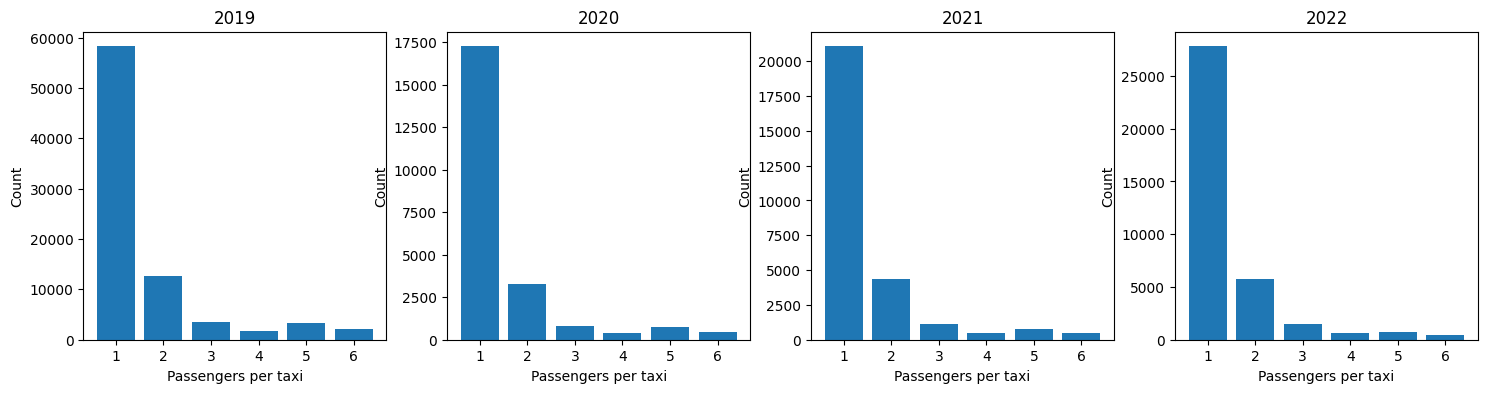

In [ ]:
# Visualization of the recompte of passatgers for any
plot_passenger_counts_per_year(df, (0, 80000), 'Passengers per taxi', 'Count', 'Passengers per taxi and per year')

In [ ]:
plot_passenger_counts_per_year(df, (0, 0.8), 'Passengers per taxi', '%', 'Percentage of passengers per taxi and per year', norm = True)

In the previous figure, you have visualized each year separately. To make the visualization easier to interpret, combine all the information into a graph.

The expected visualization has to contain three columns (different colors) for each number of passengers.

Then repeat the same chart viewing the % (use the *norm* parameter).

In [63]:
def plot_passenger_counts_combined(df, xlabel, ylabel, norm = False):
    """
    Function that displays how many passengers there are per taxi

     :param df: DataFrame with the travel data.
     :param xlabel: Label for the X axis.
     :param ylabel: Label for the Y axis.
     :param norm: If True, display the percentage instead of the count.
    """

    # Filter and pivot and create new DataFrame
    grouped_data = df.groupby(['year', 'passenger_count']).size().unstack(fill_value=0)
    (fig, axes) = plt.subplots(figsize=(8, 6))

    if norm:
      grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0)
      grouped_data_percentage.plot(kind='bar', ax=axes)
      axes.set_title('Passenger Count Percentage by Year')
    else:
      grouped_data.plot(kind='bar', ax=axes)
      axes.set_title('Passenger Count by Year')

    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel)

    return plt.show()

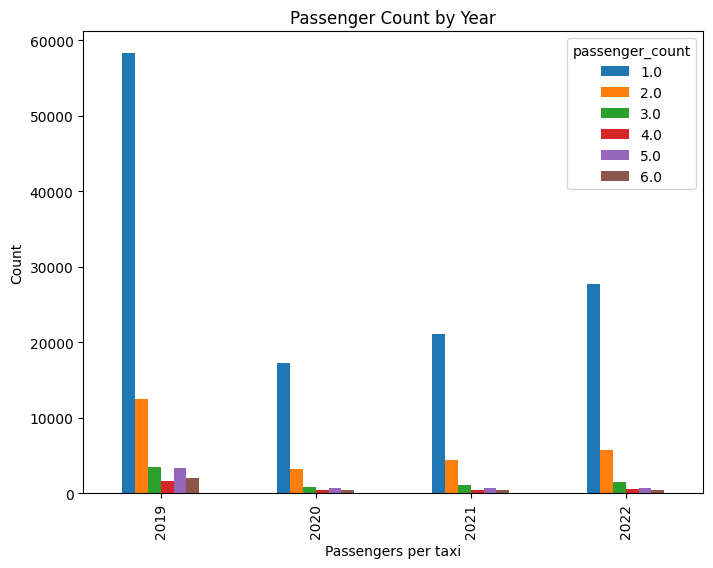

In [64]:
# Number of trips per number of passengers
plot_passenger_counts_combined(df, 'Passengers per taxi', 'Count')

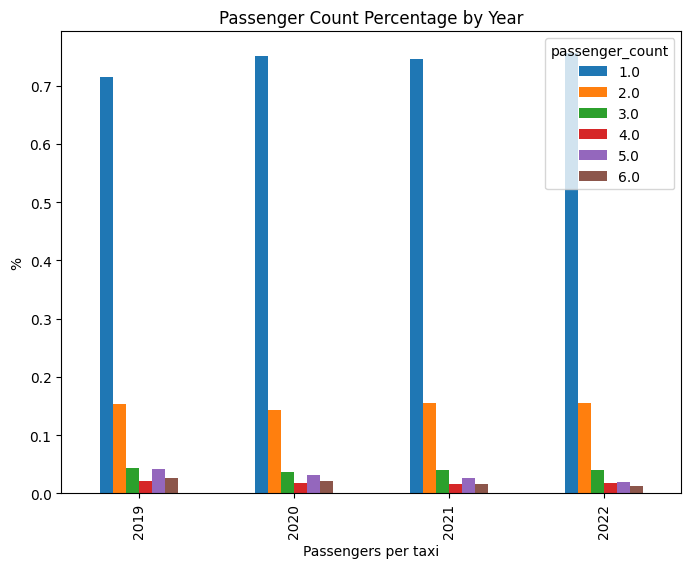

In [51]:
plot_passenger_counts_combined(df, 'Passengers per taxi', '%', norm = True)

**Question: What impact have you seen on the data? Do you think covid had a lot of impact?**

> In 2020, the taxi industry in New York experienced a significant decline in passenger numbers across all categories, reflecting the deep impact of the COVID-19 pandemic. This drop is attributable to lockdowns, social distancing measures, and reduced economic and tourist activity.

## 03. Number of trips

So far, you have seen the number of trips there have been in the years studied.

Let's study what changes can be seen if you aggregate the data by hours, days of the week, week of the year, and months.


These visualizations have to be done for the *pick-up* and *drop-off* columns.

Furthermore, the information has to be split by year and represented with dashed lines, and marked with a round or cross wherever the value is.

In [58]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Function that visualizes the number of trips by different data aggregations

     :param df: DataFrame with the travel data.
     :param column: Column where the data of interest is
     :param title: Title of the figure
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
    """

    column = columns[0]
    for year in YEARS:
      aux = df.loc[df['year'] == year, column].value_counts().sort_index()
      plt.scatter(aux.index, aux.values, label = year)
      plt.plot(aux.index, aux.values, linestyle='dashed', alpha=0.5)
      plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
                 ncol=4, fancybox=True, shadow=True)


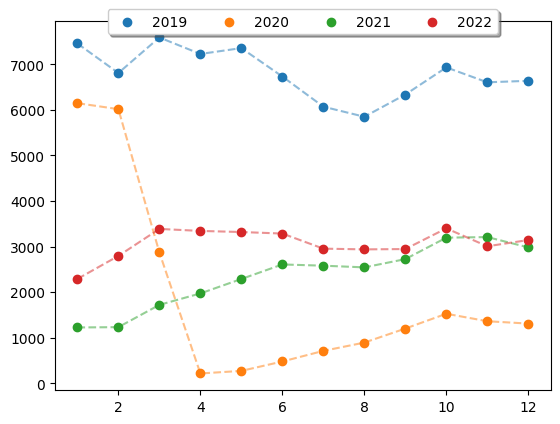

In [59]:
visualize_trips(df, ['pickup_month', 'dropoff_month'], title = 'Number of trips per month', xlabel = 'Month of the year', ylabel = 'Count')

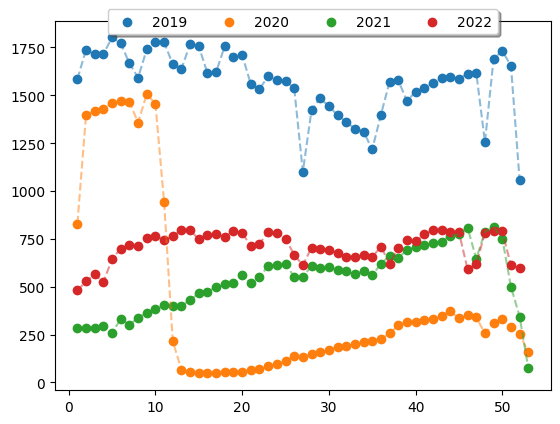

In [60]:
visualize_trips(df, ['pickup_week', 'dropoff_week'], title = 'Number of trips per week of the year', xlabel = 'Week of the year', ylabel = 'Count')

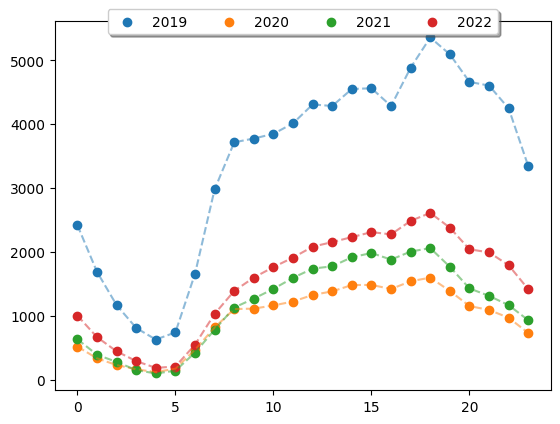

In [61]:
visualize_trips(df, ['pickup_hour', 'dropoff_hour'], title = 'Number of trips per hour', xlabel = 'Time of day', ylabel = 'Count')

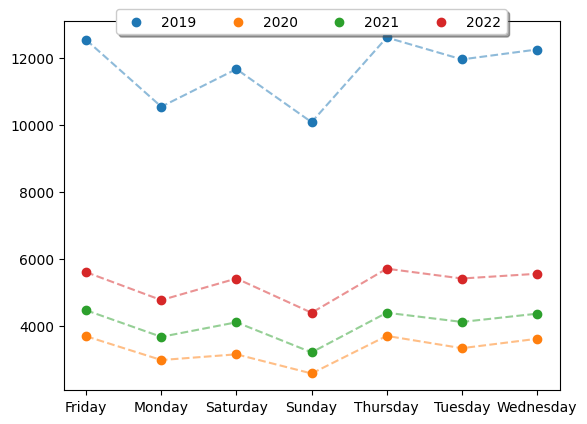

In [62]:
visualize_trips(df, ['pickup_day', 'dropoff_day'], title = 'Number of trips per day of the week', xlabel = 'Day of the week', ylabel = 'Count')

**Question: What behaviors do you see in each case? What do you think is the reason?**

> ANSWER

## 04. Distance/duration and speed relationship

In the data, there is the distance traveled by taxis on each trip. Furthermore, you can extract the duration of the trips using: *tpep_dropoff_datetime* and *tpep_pickup_datetime*.

Now, you will find out how covid affected the distances and durations of journeys along with the speed of taxis.

Do you think the traffic density changed?

### 04.1 Histograms

Visualize the **histograms** of distance and duration per year.

You can use *plt.hist()* or *plt.bar()* function.

In [78]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim, remove_outliers=False):
    """
    Function that creates a histogram from the information contained in the column *column* of the dataframe *df*
    :param df: DataFrame with the travel data.
     :param column: Column where the data of interest is
     :param title: Title of the figure
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param xlim: limits of the figure on the X axis
    """

    years = df['year'].unique()
    # Create a subplot with one row and a count of years (4)
    (fig, axes) = plt.subplots(1, len(YEARS), figsize=(18, 4))

    # This loop uses enumerate to get the index (i) for axes
    for i, year in enumerate(years):
      df_year = df[df['year'] == year]

      if remove_outliers:
          q_low = df_year[column].quantile(0.01)
          q_high = df_year[column].quantile(0.99)
          df_year = df_year[(df_year[column] > q_low) & (df_year[column] < q_high)]

      axes[i].hist(df_year[column], bins=30, edgecolor='black')
      axes[i].set_title(f'{title} - {year}')
      axes[i].set_xlabel(xlabel)
      axes[i].set_ylabel(ylabel)
      axes[i].set_xlim(xlim)

    return NotImplemented

NotImplemented

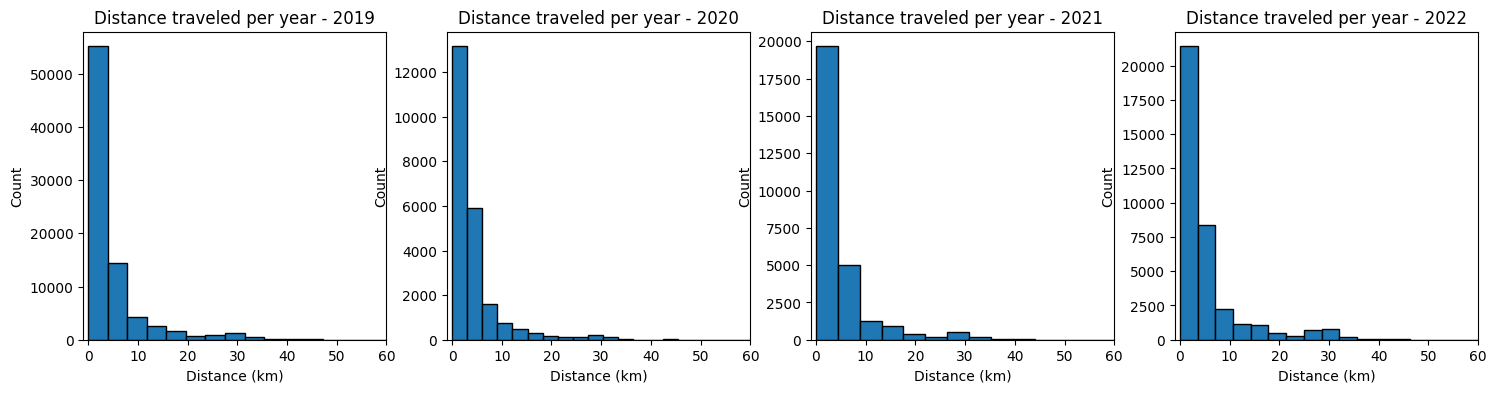

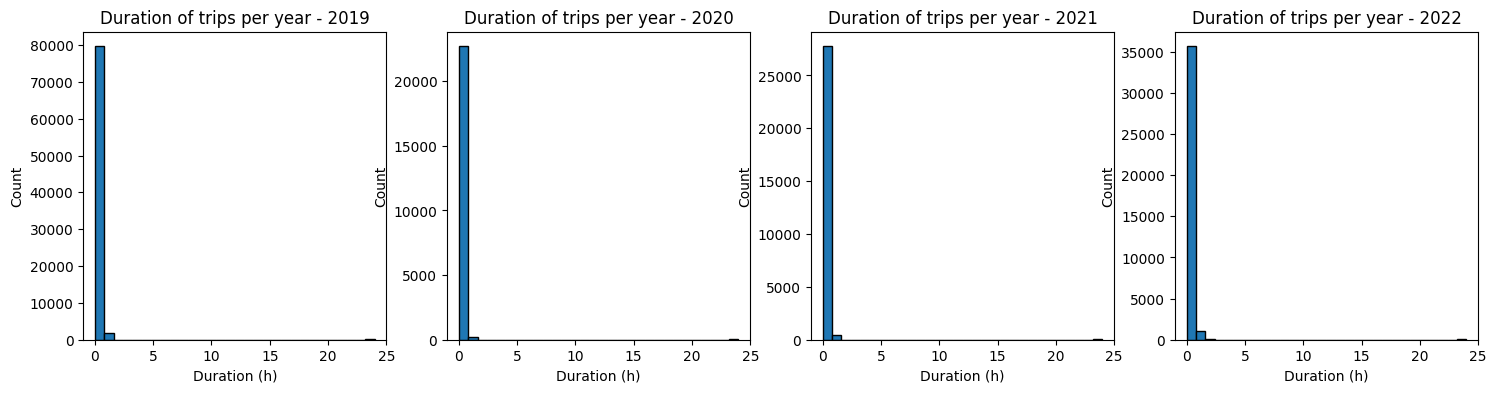

In [81]:
visualize_histograms(df, 'trip_distance', title = 'Distance traveled per year',
                     xlabel = 'Distance (km)', ylabel = 'Count', xlim = (-1, 60))

visualize_histograms(df, 'trip_duration', title = 'Duration of trips per year',
                     xlabel = 'Duration (h)', ylabel = 'Count', xlim = (-1, 25) )

NotImplemented

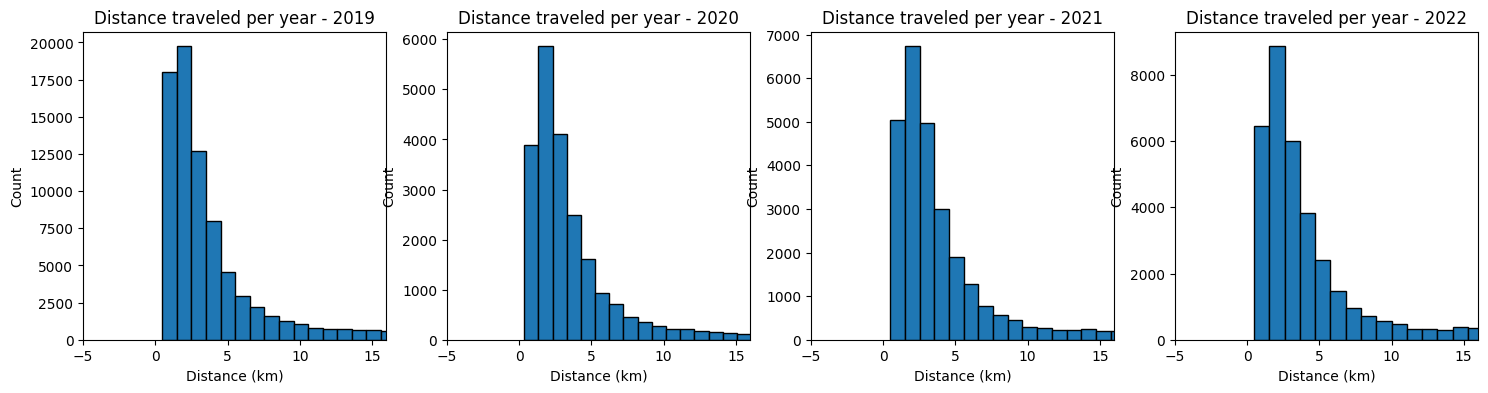

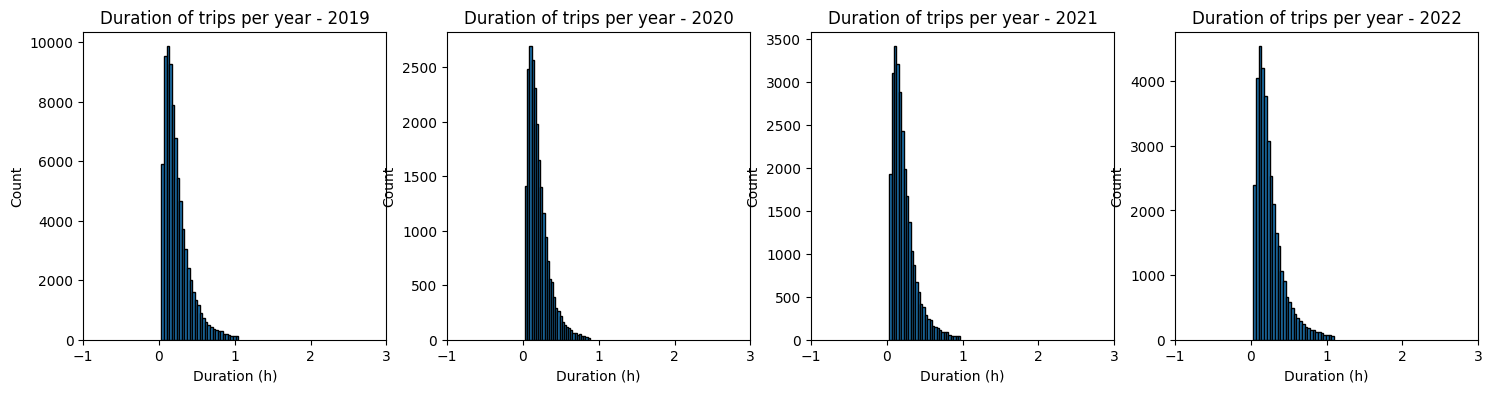

In [82]:
visualize_histograms(df, 'trip_distance', title = 'Distance traveled per year',
                     xlabel = 'Distance (km)', ylabel = 'Count', xlim = (-5, 16), remove_outliers = True)

visualize_histograms(df, 'trip_duration', title = 'Duration of trips per year',
                     xlabel = 'Duration (h)', ylabel = 'Count', xlim = (-1, 3), remove_outliers = True )

**QUESTIONS:**

* How do you think covid affected travel distances and durations?

* And the speed of taxis?

> ANSWER

### 04.2 Scatter plot and correlation

Create scatter plots to illustrate the relationship between trip duration and distance.

It is possible that the data contain samples outside the distribution (outliers). In this case, skip this samples and display the figure again.

To see if any correlation exists, it is interesting to use the *sns.regplot()* function.

In [ ]:
def scatter_plot(df, x_value, y_value, xlabel, ylabel, remove_outliers = False):
    """
    Function that displays a scatter plot given the name of the columns that contains the information
     :param df: DataFrame with the travel data.
     :param x_value: Name of the column where the values are
     :param y_value: Name of the column where the values are
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param remove_outliers:
    """
    return NotImplemented

In [ ]:
scatter_plot(df, 'trip_distance', 'trip_duration', 'Distance (km)', 'Duration (h)')

In [ ]:
scatter_plot(df, 'trip_distance', 'trip_duration', 'Distance (km)', 'Duration (h)', True)

**Question: Can you see any relationship? Can you calculate the correlation between the data to get more information?**

> ANSWER

As you did in section 3, visualize the time and distance data for the weeks and months of the year.

In [ ]:
def visualize_per_period(df, column_data, columns, xlabel, ylabel, title):
    """
    Function that show the distance / duration of trips in the time determined
     :param df: DataFrame with the travel data.
     :param column_data: Name of the column where the values are
     :param columns: Name of the columns (pickup, dropoff)
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param title: Title of the figure
    """
    return NotImplemented

In [ ]:
visualize_per_period(df, 'trip_distance', columns = ['pickup_week', 'dropoff_week'],
                    xlabel = 'Week of the year', ylabel = 'Mean distance (km)', title = 'Distance by weeks of the year')

In [ ]:
visualize_per_period(df, 'trip_distance', columns = ['pickup_month', 'dropoff_month'],
                     xlabel = 'Month of the year', ylabel = 'Mean distance (km)', title = 'Distance by months of the year')

In [ ]:
visualize_per_period(df, 'trip_duration', columns = ['pickup_week', 'dropoff_week'],
                     xlabel = 'Week of the year', ylabel = 'Mean duration (h)', title = 'Duration by weeks of the year')

In [ ]:
visualize_per_period(df, 'trip_duration', columns = ['pickup_month', 'dropoff_month'],
                     xlabel = 'Month of the year', ylabel = 'Mean duration (h)', title = 'Duration by months of the year')

**Question: Is there any strange behavior apart from covid? What can it be caused by?**

> ANSWER

### 04.3 Heatmaps

So far, you have shown the data by aggregating different information.

Now, you have to visualize the data like images. For that, you will use the *plt.imshow()* function which displays images and arrays.

Implement a function that displays heatmaps by year (each function display 3 heatmaps, one per year):

- a heatmap showing what time of day are the longest trips during the year.
- a heatmap showing what time of day are the longest trips during the week.

In [ ]:
def heatmap(df, group, column_data, xlabel, ylabel, columns = None):
    """
    Function that aggregates data appropriately to display a heatmap
     :param df: DataFrame with the data
     :param group: Set of values we want to display
     :param column_data: Name of the column where the values are
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param columns: For the case of days of the week
    """
    for year in YEARS:
      plt.figure(figsize=(30, 3))
      df_year = df[df['year'] == year]
      heatmap = df_year.groupby(group).mean(numeric_only = True)[column_data].unstack().fillna(0).values

      plt.imshow(heatmap)
      plt.colorbar()
      plt.show()


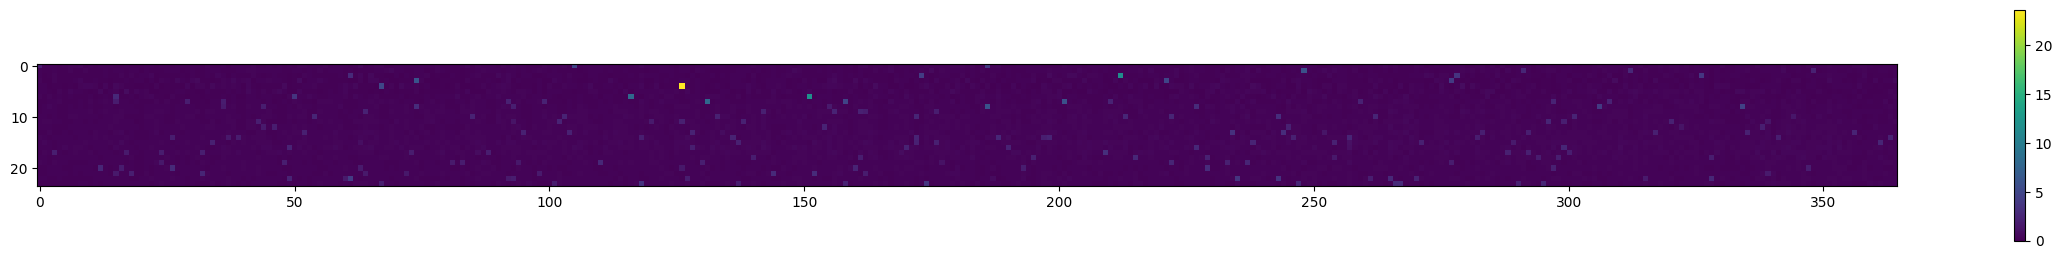

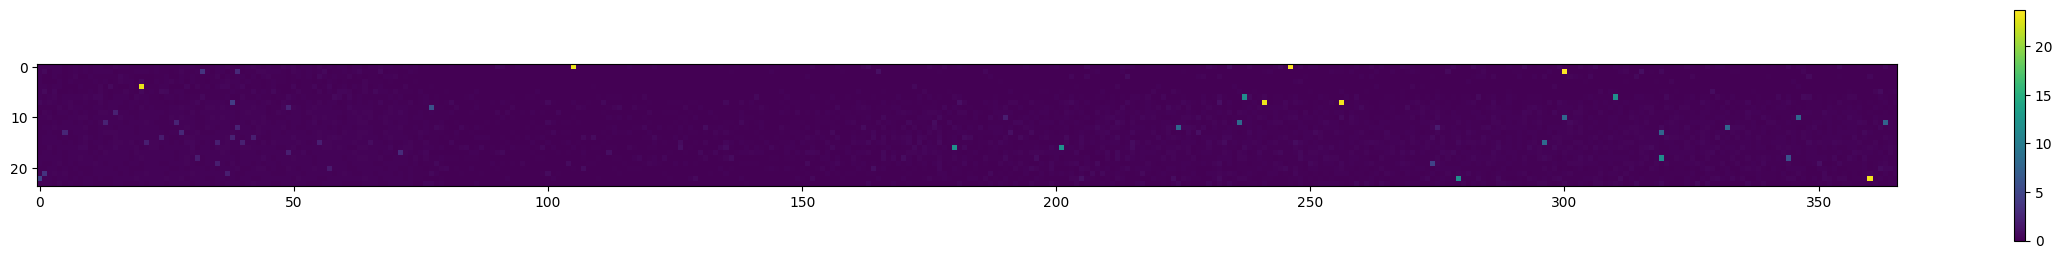

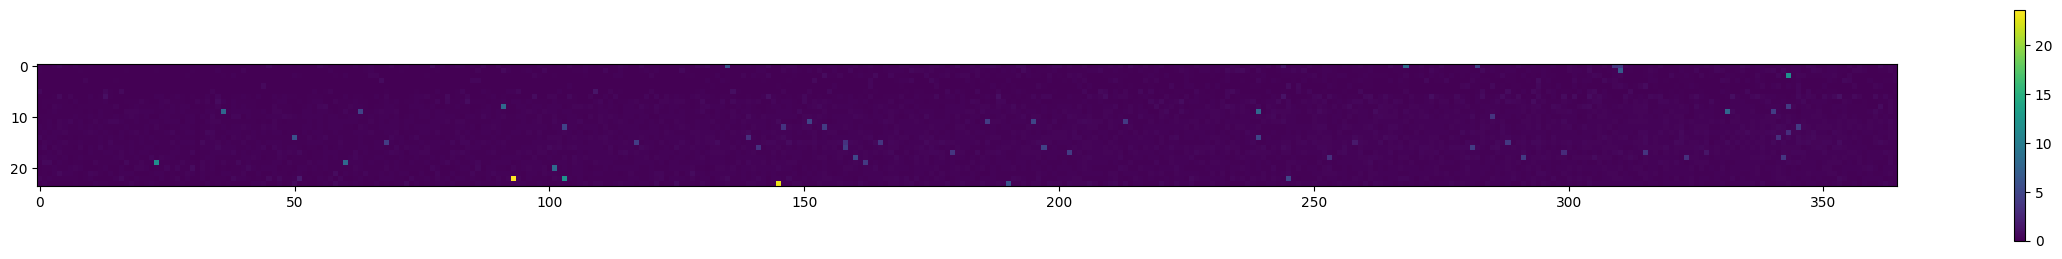

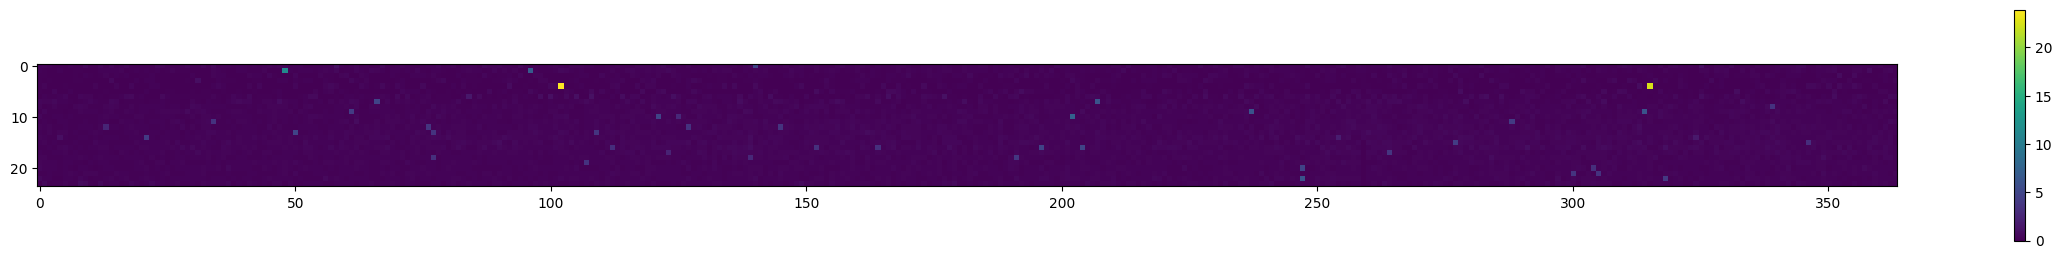

In [ ]:
heatmap(df, ['pickup_hour', 'pickup_dayofyear'], 'trip_duration', 'Days of the year', 'Hours of the day')

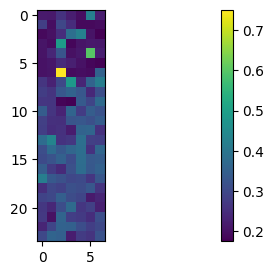

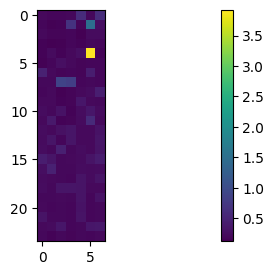

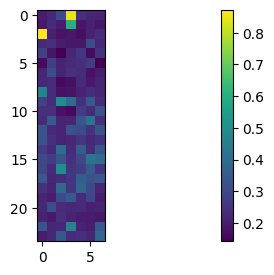

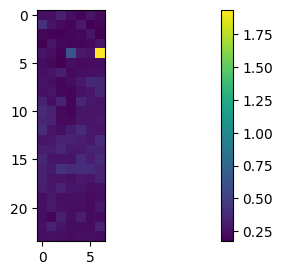

In [ ]:
heatmap(df, ['pickup_hour', 'pickup_day'], 'trip_duration', 'Times of day', 'Days of the week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
df.groupby(['pickup_hour','trip_duration']).size()

pickup_hour  trip_duration
0            0.017222         1
             0.017500         1
             0.017778         2
             0.018056         4
             0.019444         2
                             ..
23           23.945000        1
             23.961389        1
             23.971389        1
             23.973889        1
             23.976111        1
Length: 46075, dtype: int64

Repeat the previous heatmaps visualizing the distance.

In [ ]:
heatmap(df, ['pickup_hour', 'pickup_dayofyear'], 'trip_distance', 'Days of the year', 'Times of the day')

In [ ]:
heatmap(df, ['pickup_hour', 'pickup_day'], 'trip_distance', 'Times of the day', 'Days of the week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Finally, view the average speed at different times of the day during the week.

In [ ]:
def speed_heatmap(df, group, xlabel, ylabel, columns = None):
    """
    Function that aggregates data appropriately to display a speed heatmap
     :param df: DataFrame with the travel data.
     :param group: Set of values we want to display
     :param xlabel: X-axis label
     :param ylabel: Y-axis label
     :param columns: For the case of days of the week
    """

    return NotImplemented

In [ ]:
speed_heatmap(df, ['pickup_hour', 'pickup_day'], 'Times of the day', 'Days of the week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

**Question: Which conclusions do you obtain from the heatmaps?**
    
> ANSWER

## Numpy, Pandas and Matplotlib Sheets


**1. Python Basics**

1. **List Comprehensions**:

  A list comprehension provides a concise method to create lists by performing an operation on each item in an existing list (or other iterable), optionally filtering items based on a condition.

  Example: If you want to square all even numbers from 0 to 9:

  ```
  even_squares = [x**2 for x in range(10) if x % 2 == 0]
  ```

2. **NumPy**:

  - **'*np.unique()*'**: Returns the sorted unique elements of an array and can also return their counts if return_counts=True is specified.

    Example:
    ```
    numbers = np.array([1,2,3,3,4,4,4,5])
    unique, counts = np.unique(numbers, return_counts=True)
    ```




3. **Pandas**:

  - **Aggregation**:

      - *.groupby()*: Groups data by column values.
      - *.count()*: Counts non-null values.
      - *.mean()*: Calculates the mean.

        ```
        # Group by 'Age' and count the 'Name'
        grouped = df.groupby('Age')['Name'].count()
        ```
  - **Pivot Table**:

      - *.pivot_table()*: Reshapes data based on column values.

  - **Manipulation**:

      - *.value_counts()*: Returns the frequency of unique values in a Series.
      - *.unstack()*: Pivots a level of row/column labels.
      - *.fillna()*: Fills NA/NaN values with a specified value.


4. **Matplotlib (and Seaborn)**:

  - **Basic Plotting**:

      - *plt.bar()*: Bar chart.
      - *plt.scatter()*: Scatter plot.
      - *plt.plot()*: Line plot.
      - *plt.show()*: Display the plot.

  - **Subplots**: *plt.subplots()*: Creates a figure and a set of subplots.

  - **Styling**: Use functions like plt.xlabel(), plt.ylabel(), plt.title(), and plt.legend() to set titles, labels, and legends.

  - **Heatmaps**: Visual representation of data where individual values are represented as colors. Use plt.imshow() or sns.heatmap() to create a heatmap.

  - **Bar Charts**: Use plt.bar() to visualize data in the form of bars.

  - **Histograms**: Represents the frequency distribution of a dataset. Use plt.hist() or plt.bar() for histograms.

  - **Scatter Plots**: Depict relationships between two numerical variables. Use plt.scatter() to create scatter plots.